# In this project, we will be examining which venue would be a better host city for the NCAA Men's Basketball Final Four. The state of California has not hosted a Final Four since 1975, therefore I decided to compare and contrast Los Angeles (Staples Center in Downtown LA) and San Francisco (Chase Center in Mission Bay) as potential hosts, with the criteria that the host venues have a good mix of restaurants, hotels and bars nearby. We will use Four Square calls to get venues for the neigborhoods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Because I want to compare the two venues, the first step is to create a Data frame for the Staples Center with its Geo-coordinates (Downtown LA) and then for the Chase Center (Mission Bay). 

In [2]:
data = [['Staples Center', 'Downtown Los Angeles', 34.043056, -118.267222]]
sc = pd.DataFrame(data, columns = ['Venue', 'Neighborhood', 'Latitude', 'Longitude']) 
sc

,Venue,Neighborhood,Latitude,Longitude
0,Staples Center,Downtown Los Angeles,34.043056,-118.267222


In [3]:
data1 = [['Chase Center', 'Mission Bay', 37.768056, -122.3875]]
cs = pd.DataFrame(data1, columns = ['Venue', 'Neighborhood', 'Latitude', 'Longitude']) 
cs

,Venue,Neighborhood,Latitude,Longitude
0,Chase Center,Mission Bay,37.768056,-122.3875


In [4]:
#importing appropriate libraries and packages 
import json 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium 

print('Libraries imported.')

Libraries imported.


In [5]:
address = 'Los Angeles, US'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Los Angeles are 34.0536834, -118.2427669.


# Mapping the Staples Center

In [6]:
map_staples = folium.Map(location=[latitude, longitude], zoom_start=14)


for lat, lng, label in zip(sc['Latitude'], sc['Longitude'], sc['Neighborhood']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_staples)  
    
map_staples

In [7]:
#Setting up Four Square API call. 

CLIENT_ID = 'FZ5PC41XREUOZVSTK4PDUTWECH0AEDIOXORFUC51PKQWBNAP' #Foursquare ID
CLIENT_SECRET = 'UYRHL3MMXRAIWBMBVXD0HXB3X2LJSMGVBTZY1XYNENWY2PD2' #Foursquare Secret
VERSION = '20190418' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZ5PC41XREUOZVSTK4PDUTWECH0AEDIOXORFUC51PKQWBNAP
CLIENT_SECRET:UYRHL3MMXRAIWBMBVXD0HXB3X2LJSMGVBTZY1XYNENWY2PD2


In [8]:
neighborhood_latitude = sc.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = sc.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = sc.loc[0, 'Venue'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Staples Center are 34.043056, -118.267222.


In [9]:
radius = 3000 #going to get all venues within just under a 2 mile radius of Staple Center
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbd5f58db04f530c8761cb5'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-42893400f964a5207e231fe3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/stadium_basketball_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d18b941735',
         'name': 'Basketball Stadium',
         'pluralName': 'Basketball Stadiums',
         'primary': True,
         'shortName': 'Basketball'}],
       'id': '42893400f964a5207e231fe3',
       'location': {'address': '1111 S Figueroa St',
        'cc': 'US',
        'city': 'Los Angeles',
        'country': 'United States',
        'crossStreet': 'at Chick Hearn Ct',
        'distance': 4,
        'formattedAddress': ['1111 S Figueroa St (at Chick Hearn Ct)',
         'Los 

In [11]:
#setting up a function to loop through venues and categorize them. 

def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
sc_venues = getNearbyVenues(names=sc['Neighborhood'],
                                   latitudes=sc['Latitude'],
                                   longitudes=sc['Longitude']
                                  )

Downtown Los Angeles


In [13]:
#showing the first 5 venues

print(sc_venues.shape)
sc_venues.head()

(100, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,STAPLES Center,34.043085,-118.267191,Basketball Stadium
1,Downtown Los Angeles,34.043056,-118.267222,LA Live,34.044321,-118.265827,General Entertainment
2,Downtown Los Angeles,34.043056,-118.267222,STAPLES Center VIP SUITES,34.043308,-118.267265,Basketball Court
3,Downtown Los Angeles,34.043056,-118.267222,Microsoft Theater,34.044343,-118.267061,Concert Hall
4,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel


# Want to get a sense of the number of venues in Downtown LA and will compare to Mission Bay

In [14]:
sc_venues["Venue Category"].value_counts()

Bar                          8
Hotel                        7
Coffee Shop                  5
French Restaurant            3
Sandwich Place               3
Sushi Restaurant             3
Theater                      3
Salon / Barbershop           2
Asian Restaurant             2
Italian Restaurant           2
Roof Deck                    2
Lounge                       2
Steakhouse                   2
Taco Place                   2
Hotel Bar                    2
American Restaurant          2
New American Restaurant      2
Gym                          2
Cycle Studio                 1
Seafood Restaurant           1
Latin American Restaurant    1
Massage Studio               1
Burger Joint                 1
Mexican Restaurant           1
Juice Bar                    1
Café                         1
Fried Chicken Joint          1
Shopping Mall                1
Basketball Stadium           1
Rock Club                    1
                            ..
Movie Theater                1
Marijuan

In [15]:
# one hot encoding
sc_onehot = pd.get_dummies(sc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sc_onehot['Neighborhood'] = sc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sc_onehot.columns[-1]] + list(sc_onehot.columns[:-1])
sc_onehot = sc_onehot[fixed_columns]

sc_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bar,Basketball Court,Basketball Stadium,Beer Bar,Bookstore,Brewery,Burger Joint,...,Scenic Lookout,Seafood Restaurant,Shopping Mall,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Theater,Whisky Bar
0,Downtown Los Angeles,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Downtown Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Downtown Los Angeles,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Downtown Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Downtown Los Angeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
sc_onehot.shape

(100, 65)

In [17]:
sc_grouped = sc_onehot.groupby('Neighborhood').mean().reset_index()
sc_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Bar,Basketball Court,Basketball Stadium,Beer Bar,Bookstore,Brewery,Burger Joint,...,Scenic Lookout,Seafood Restaurant,Shopping Mall,Speakeasy,Sports Bar,Steakhouse,Sushi Restaurant,Taco Place,Theater,Whisky Bar
0,Downtown Los Angeles,0.02,0.02,0.08,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.01


In [18]:
#Get the top ten venues by frequency. 

num_top_venues = 10

for hood in sc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sc_grouped[sc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Downtown Los Angeles----
                 venue  freq
0                  Bar  0.08
1                Hotel  0.07
2          Coffee Shop  0.05
3              Theater  0.03
4     Sushi Restaurant  0.03
5       Sandwich Place  0.03
6    French Restaurant  0.03
7  American Restaurant  0.02
8               Lounge  0.02
9            Hotel Bar  0.02




# Now we work on creating a Dataframe with the Top Ten venues

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sc_venues_sorted = pd.DataFrame(columns=columns)
sc_venues_sorted['Neighborhood'] = sc_grouped['Neighborhood']

for ind in np.arange(sc_grouped.shape[0]):
    sc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sc_grouped.iloc[ind, :], num_top_venues)

sc_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Los Angeles,Bar,Hotel,Coffee Shop,French Restaurant,Sushi Restaurant,Theater,Sandwich Place,Roof Deck,Gym,Hotel Bar


# Now, let's repeat the process for Chase Center and its Mission Bay neighborhood

In [21]:
address = 'San Francisco, US'

geolocator = Nominatim(user_agent="la_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Francisco are 37.7792808, -122.4192363.


In [22]:
#mapping Chase Center

map_chase = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(cs['Latitude'], cs['Longitude'], cs['Neighborhood']):
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_chase)  
    
map_chase

# Many of the following cells are repeating the above process we did for Downtown LA

In [23]:
CLIENT_ID = 'FZ5PC41XREUOZVSTK4PDUTWECH0AEDIOXORFUC51PKQWBNAP' #Foursquare ID
CLIENT_SECRET = 'UYRHL3MMXRAIWBMBVXD0HXB3X2LJSMGVBTZY1XYNENWY2PD2' #Foursquare Secret
VERSION = '20190419' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZ5PC41XREUOZVSTK4PDUTWECH0AEDIOXORFUC51PKQWBNAP
CLIENT_SECRET:UYRHL3MMXRAIWBMBVXD0HXB3X2LJSMGVBTZY1XYNENWY2PD2


In [24]:
neighborhood_latitude = cs.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = cs.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = cs.loc[0, 'Venue'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chase Center are 37.768056, -122.3875.


In [25]:
radius = 3000
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbd5f5a9fb6b776fd5dc0b3'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-570fbb58498ef98443cf26fb-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/streetfood_',
          'suffix': '.png'},
         'id': '53e0feef498e5aac066fd8a9',
         'name': 'Street Food Gathering',
         'pluralName': 'Street Food Gatherings',
         'primary': True,
         'shortName': 'Street Food Gathering'}],
       'id': '570fbb58498ef98443cf26fb',
       'location': {'address': '601 Mission Bay Blvd N',
        'cc': 'US',
        'city': 'San Francisco',
        'country': 'United States',
        'crossStreet': 'at 4th St',
        'distance': 476,
        'formattedAddress': ['601 Mission Bay Blvd N (at 4th St)',
         'San Francisco

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
cs_venues = getNearbyVenues(names=cs['Neighborhood'],
                                   latitudes=cs['Latitude'],
                                   longitudes=cs['Longitude']
                                  )

Mission Bay


In [29]:
print(cs_venues.shape)
cs_venues.head()

(100, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mission Bay,37.768056,-122.3875,SPARK Social SF,37.770762,-122.391689,Street Food Gathering
1,Mission Bay,37.768056,-122.3875,UCSF Bakar Fitness & Rec Center,37.768146,-122.393290,Gym
2,Mission Bay,37.768056,-122.3875,Mission Bay Kids Park,37.772068,-122.392548,Playground
3,Mission Bay,37.768056,-122.3875,SFFSoccer Mission Bay Field,37.770886,-122.392197,Soccer Field
4,Mission Bay,37.768056,-122.3875,Pawtrero Hill Bathhouse and Feed Company,37.764082,-122.394384,Pet Store


# Remember we are looking to eventually isolate Restaurants, Hotels and Bars for Downtown LA and Mission Bay, pay attention to the value counts... do you see any hotels here?

In [30]:
cs_venues["Venue Category"].value_counts()

Coffee Shop                                 7
Brewery                                     6
Art Gallery                                 5
Café                                        5
Spa                                         3
Park                                        3
Gym                                         3
New American Restaurant                     3
Pizza Place                                 3
Vietnamese Restaurant                       3
Baseball Stadium                            3
Sandwich Place                              2
Street Food Gathering                       2
Wine Bar                                    2
Cocktail Bar                                2
Gym / Fitness Center                        2
French Restaurant                           2
Breakfast Spot                              2
Wine Shop                                   2
Sporting Goods Shop                         2
Yoga Studio                                 2
Motorcycle Shop                   

In [31]:
cs_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Mission Bay,100,100,100,100,100,100


In [32]:
print('There are {} uniques categories.'.format(len(cs_venues['Venue Category'].unique())))

There are 57 uniques categories.


# Continuing the process from earlier, repeating for Mission Bay

In [33]:
# one hot encoding
cs_onehot = pd.get_dummies(cs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cs_onehot['Neighborhood'] = cs_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cs_onehot.columns[-1]] + list(cs_onehot.columns[:-1])
cs_onehot = cs_onehot[fixed_columns]

cs_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Bakery,Baseball Stadium,Breakfast Spot,Brewery,...,Spanish Restaurant,Sporting Goods Shop,Street Food Gathering,Tea Room,Tennis Court,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Mission Bay,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Mission Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mission Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mission Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mission Bay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
cs_onehot.shape

(100, 58)

In [35]:
cs_grouped = cs_onehot.groupby('Neighborhood').mean().reset_index()
cs_grouped

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Bakery,Baseball Stadium,Breakfast Spot,Brewery,...,Spanish Restaurant,Sporting Goods Shop,Street Food Gathering,Tea Room,Tennis Court,Thai Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Mission Bay,0.01,0.01,0.05,0.01,0.01,0.01,0.03,0.02,0.06,...,0.01,0.02,0.02,0.01,0.01,0.01,0.03,0.02,0.02,0.02


In [36]:
num_top_venues = 10

for hood in cs_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cs_grouped[cs_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Mission Bay----
                     venue  freq
0              Coffee Shop  0.07
1                  Brewery  0.06
2              Art Gallery  0.05
3                     Café  0.05
4  New American Restaurant  0.03
5                     Park  0.03
6    Vietnamese Restaurant  0.03
7         Baseball Stadium  0.03
8              Pizza Place  0.03
9                      Gym  0.03




In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cs_venues_sorted = pd.DataFrame(columns=columns)
cs_venues_sorted['Neighborhood'] = cs_grouped['Neighborhood']

for ind in np.arange(sc_grouped.shape[0]):
    cs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cs_grouped.iloc[ind, :], num_top_venues)

cs_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mission Bay,Coffee Shop,Brewery,Art Gallery,Café,Pizza Place,Gym,Vietnamese Restaurant,Spa,New American Restaurant,Baseball Stadium


# Now, we have two dataframes, each one listing the Top Ten venues for both neigborhood. Let's combine them!

In [38]:
chase_staples_venues = sc_venues_sorted.append(cs_venues_sorted, ignore_index=True)
chase_staples_venues

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Los Angeles,Bar,Hotel,Coffee Shop,French Restaurant,Sushi Restaurant,Theater,Sandwich Place,Roof Deck,Gym,Hotel Bar
1,Mission Bay,Coffee Shop,Brewery,Art Gallery,Café,Pizza Place,Gym,Vietnamese Restaurant,Spa,New American Restaurant,Baseball Stadium


# Examining the dataframe above, we see that a hotel doesn't appear in the Top Ten venues for Mission Bay, meanwhile Downtown LA features bars, hotels and restaurants. 

# Now we can start building a dataframe to map the Bars, Restaurants and Hotels around Downtown LA and Mission Bay. This will be two seperate maps made from two seperate dataframes. This will take some work. Follow along.

In [39]:
#First we will combine both dataframes with the venue categories and the geocoordinates 
chase_staples_venues_geo = sc_venues.append(cs_venues, ignore_index=True)
chase_staples_venues_geo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,STAPLES Center,34.043085,-118.267191,Basketball Stadium
1,Downtown Los Angeles,34.043056,-118.267222,LA Live,34.044321,-118.265827,General Entertainment
2,Downtown Los Angeles,34.043056,-118.267222,STAPLES Center VIP SUITES,34.043308,-118.267265,Basketball Court
3,Downtown Los Angeles,34.043056,-118.267222,Microsoft Theater,34.044343,-118.267061,Concert Hall
4,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
5,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Sports Bar
6,Downtown Los Angeles,34.043056,-118.267222,Yard House,34.045482,-118.265910,Bar
7,Downtown Los Angeles,34.043056,-118.267222,The Palm Los Angeles,34.042896,-118.264124,Steakhouse
8,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel Bar
9,Downtown Los Angeles,34.043056,-118.267222,Fleming's Prime Steakhouse & Wine Bar,34.044737,-118.264363,Steakhouse


In [40]:
# First, we will create a dataframe to isolate all of the hotels

cs_hotels = chase_staples_venues_geo[chase_staples_venues_geo['Venue Category'].str.contains('Hotel')]
cs_hotels



,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel Bar
12,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
17,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
32,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
33,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
37,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel Bar
51,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
60,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel


In [41]:
#One thing to point out in the above dataframe is row 8 and 37, which list hotel bars 
#because the string contains hotels. 
#I decided to leave these rows in because they are actually part of a hotel 
#that is not listed/duplicated in this dataframe, but still represent a hotel. 
#However, I decided to edit the row to just name it as a hotel for ease of mapping later.

cs_hotels.replace('Hotel Bar','Hotel', inplace = True)
cs_hotels

/Users/ThomasMatich/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel
12,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
17,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
32,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
33,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
37,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel
51,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
60,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel


In [42]:
#now let's create a restaurants dataframe

cs_restaurant = chase_staples_venues_geo[chase_staples_venues_geo['Venue Category'].str.contains('Restaurant')]
cs_restaurant

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Downtown Los Angeles,34.043056,-118.267222,Broken Spanish,34.043366,-118.263857,Mexican Restaurant
16,Downtown Los Angeles,34.043056,-118.267222,Faith & Flower,34.046078,-118.261570,New American Restaurant
35,Downtown Los Angeles,34.043056,-118.267222,Bottega Louie,34.047271,-118.256520,Italian Restaurant
38,Downtown Los Angeles,34.043056,-118.267222,The Stocking Frame,34.042854,-118.257486,American Restaurant
39,Downtown Los Angeles,34.043056,-118.267222,SUGARFISH,34.047460,-118.256747,Sushi Restaurant
43,Downtown Los Angeles,34.043056,-118.267222,Shibumi,34.044243,-118.256073,Japanese Restaurant
48,Downtown Los Angeles,34.043056,-118.267222,Little Sister,34.047139,-118.256151,Asian Restaurant
49,Downtown Los Angeles,34.043056,-118.267222,Chick-fil-A,34.049452,-118.259506,Fast Food Restaurant
52,Downtown Los Angeles,34.043056,-118.267222,Plan Check,34.052436,-118.263639,American Restaurant
55,Downtown Los Angeles,34.043056,-118.267222,The Lobby At The Nomad Hotel,34.046790,-118.255674,New American Restaurant


In [43]:
# We want to easily map restaurants later on, so we are not concerned with the "type"
# of restaurant it is. Therefore, we will drop the entire column and that add it back with "Restaurant" as the entry 
# for every row.

cs_restaurant.drop(['Venue Category'], axis=1, inplace = True)

/Users/ThomasMatich/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
cs_restaurant 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
11,Downtown Los Angeles,34.043056,-118.267222,Broken Spanish,34.043366,-118.263857
16,Downtown Los Angeles,34.043056,-118.267222,Faith & Flower,34.046078,-118.261570
35,Downtown Los Angeles,34.043056,-118.267222,Bottega Louie,34.047271,-118.256520
38,Downtown Los Angeles,34.043056,-118.267222,The Stocking Frame,34.042854,-118.257486
39,Downtown Los Angeles,34.043056,-118.267222,SUGARFISH,34.047460,-118.256747
43,Downtown Los Angeles,34.043056,-118.267222,Shibumi,34.044243,-118.256073
48,Downtown Los Angeles,34.043056,-118.267222,Little Sister,34.047139,-118.256151
49,Downtown Los Angeles,34.043056,-118.267222,Chick-fil-A,34.049452,-118.259506
52,Downtown Los Angeles,34.043056,-118.267222,Plan Check,34.052436,-118.263639
55,Downtown Los Angeles,34.043056,-118.267222,The Lobby At The Nomad Hotel,34.046790,-118.255674


In [45]:
cs_restaurant['Venue Category'] = ''
cs_restaurant

/Users/ThomasMatich/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Downtown Los Angeles,34.043056,-118.267222,Broken Spanish,34.043366,-118.263857,
16,Downtown Los Angeles,34.043056,-118.267222,Faith & Flower,34.046078,-118.261570,
35,Downtown Los Angeles,34.043056,-118.267222,Bottega Louie,34.047271,-118.256520,
38,Downtown Los Angeles,34.043056,-118.267222,The Stocking Frame,34.042854,-118.257486,
39,Downtown Los Angeles,34.043056,-118.267222,SUGARFISH,34.047460,-118.256747,
43,Downtown Los Angeles,34.043056,-118.267222,Shibumi,34.044243,-118.256073,
48,Downtown Los Angeles,34.043056,-118.267222,Little Sister,34.047139,-118.256151,
49,Downtown Los Angeles,34.043056,-118.267222,Chick-fil-A,34.049452,-118.259506,
52,Downtown Los Angeles,34.043056,-118.267222,Plan Check,34.052436,-118.263639,
55,Downtown Los Angeles,34.043056,-118.267222,The Lobby At The Nomad Hotel,34.046790,-118.255674,


In [46]:
cs_restaurant.loc[::,'Venue Category'] = 'Restaurant'
cs_restaurant

/Users/ThomasMatich/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
11,Downtown Los Angeles,34.043056,-118.267222,Broken Spanish,34.043366,-118.263857,Restaurant
16,Downtown Los Angeles,34.043056,-118.267222,Faith & Flower,34.046078,-118.261570,Restaurant
35,Downtown Los Angeles,34.043056,-118.267222,Bottega Louie,34.047271,-118.256520,Restaurant
38,Downtown Los Angeles,34.043056,-118.267222,The Stocking Frame,34.042854,-118.257486,Restaurant
39,Downtown Los Angeles,34.043056,-118.267222,SUGARFISH,34.047460,-118.256747,Restaurant
43,Downtown Los Angeles,34.043056,-118.267222,Shibumi,34.044243,-118.256073,Restaurant
48,Downtown Los Angeles,34.043056,-118.267222,Little Sister,34.047139,-118.256151,Restaurant
49,Downtown Los Angeles,34.043056,-118.267222,Chick-fil-A,34.049452,-118.259506,Restaurant
52,Downtown Los Angeles,34.043056,-118.267222,Plan Check,34.052436,-118.263639,Restaurant
55,Downtown Los Angeles,34.043056,-118.267222,The Lobby At The Nomad Hotel,34.046790,-118.255674,Restaurant


In [47]:
# building a dataframe for bars

cs_bars = chase_staples_venues_geo[chase_staples_venues_geo['Venue Category'].str.contains('Bar')]
cs_bars

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Sports Bar
6,Downtown Los Angeles,34.043056,-118.267222,Yard House,34.045482,-118.265910,Bar
8,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel Bar
15,Downtown Los Angeles,34.043056,-118.267222,Caña Rum Bar,34.044480,-118.263797,Cocktail Bar
19,Downtown Los Angeles,34.043056,-118.267222,Mikkeller Bar,34.042012,-118.259214,Beer Bar
37,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel Bar
42,Downtown Los Angeles,34.043056,-118.267222,Broken Shaker,34.044891,-118.256563,Bar
50,Downtown Los Angeles,34.043056,-118.267222,Monty Bar,34.051727,-118.266674,Bar
53,Downtown Los Angeles,34.043056,-118.267222,Seven Grand,34.046928,-118.255908,Whisky Bar
54,Downtown Los Angeles,34.043056,-118.267222,The Eight Bar,34.046023,-118.257814,Bar


In [48]:
#cleaning the data to generalize for "Bar"

cs_bars.replace('Hotel Bar','Bar', inplace = True)
cs_bars.replace('Wine Bar','Bar', inplace = True)
cs_bars.replace('Sports Bar','Bar', inplace = True)
cs_bars.replace('Cocktail Bar','Bar', inplace = True)
cs_bars.replace('Beer Bar','Bar', inplace = True)
cs_bars.replace('Whisky Bar','Bar', inplace = True)

cs_bars


/Users/ThomasMatich/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4032: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Bar
6,Downtown Los Angeles,34.043056,-118.267222,Yard House,34.045482,-118.265910,Bar
8,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Bar
15,Downtown Los Angeles,34.043056,-118.267222,Caña Rum Bar,34.044480,-118.263797,Bar
19,Downtown Los Angeles,34.043056,-118.267222,Mikkeller Bar,34.042012,-118.259214,Bar
37,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Bar
42,Downtown Los Angeles,34.043056,-118.267222,Broken Shaker,34.044891,-118.256563,Bar
50,Downtown Los Angeles,34.043056,-118.267222,Monty Bar,34.051727,-118.266674,Bar
53,Downtown Los Angeles,34.043056,-118.267222,Seven Grand,34.046928,-118.255908,Bar
54,Downtown Los Angeles,34.043056,-118.267222,The Eight Bar,34.046023,-118.257814,Bar


In [49]:
#combining the hotels and bar dataframe into one

cs_new = cs_hotels.append(cs_bars, ignore_index=True)

In [50]:
cs_new

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
1,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel
2,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
3,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
4,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
5,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
6,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel
7,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel
9,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Bar


# We want to get rid of the Salon/Barbershops and Juice bars in the three cells below

In [51]:
cs_new.drop([20], inplace = True)

In [52]:
cs_new.drop([21], inplace = True)

In [53]:
cs_new.drop([24], inplace = True)

In [54]:
cs_new

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
1,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel
2,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
3,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
4,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
5,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
6,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel
7,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel
9,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Bar


# Finally, we can add the restaurants, so now we will have a dataframe that contains the Hotels, Restaurants and Bars in Downtown Los Angeles and Mission Bay along with their geocoordinates.

In [55]:
cs_final = cs_new.append(cs_restaurant, ignore_index=True)
cs_final

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
1,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel
2,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
3,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
4,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
5,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
6,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel
7,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel
9,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Bar


# For mapping we will seperate the frame by Neighborhood: Downtown LA and Mission Bay

In [56]:
la = cs_final[cs_final['Neighborhood'].str.contains('Downtown Los Angeles')]
la

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Los Angeles,34.043056,-118.267222,JW Marriott Los Angeles L.A. LIVE,34.045241,-118.266471,Hotel
1,Downtown Los Angeles,34.043056,-118.267222,Veranda Bar at the Hotel Figueroa,34.045399,-118.264064,Hotel
2,Downtown Los Angeles,34.043056,-118.267222,Jw Marriot Olympic 1,34.045500,-118.266663,Hotel
3,Downtown Los Angeles,34.043056,-118.267222,Hotel Indigo,34.047396,-118.264677,Hotel
4,Downtown Los Angeles,34.043056,-118.267222,Freehand Los Angeles,34.044964,-118.256593,Hotel
5,Downtown Los Angeles,34.043056,-118.267222,Ace Hotel Downtown Los Angeles,34.041763,-118.256630,Hotel
6,Downtown Los Angeles,34.043056,-118.267222,Spire 73,34.050034,-118.260004,Hotel
7,Downtown Los Angeles,34.043056,-118.267222,The NoMad Hotel Los Angeles,34.046778,-118.255584,Hotel
8,Downtown Los Angeles,34.043056,-118.267222,Tuck Hotel,34.042508,-118.253934,Hotel
9,Downtown Los Angeles,34.043056,-118.267222,Golden Road Lounge At Staples Center,34.041736,-118.266679,Bar


In [57]:
sf = cs_final[cs_final['Neighborhood'].str.contains('Mission Bay')]
sf

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
23,Mission Bay,37.768056,-122.3875,Dogpatch Saloon,37.757963,-122.388534,Bar
24,Mission Bay,37.768056,-122.3875,Petit Marlowe,37.778101,-122.393727,Bar
25,Mission Bay,37.768056,-122.3875,Terroir,37.776524,-122.408413,Bar
26,Mission Bay,37.768056,-122.3875,Nommo,37.786884,-122.391841,Bar
49,Mission Bay,37.768056,-122.3875,Tadu Ethiopian Kitchen,37.773950,-122.391543,Restaurant
50,Mission Bay,37.768056,-122.3875,Chez Maman East,37.762531,-122.396652,Restaurant
51,Mission Bay,37.768056,-122.3875,Marcella's Lasagneria & Cucina,37.757996,-122.389235,Restaurant
52,Mission Bay,37.768056,-122.3875,Hard Knox Cafe,37.757564,-122.388313,Restaurant
53,Mission Bay,37.768056,-122.3875,Marlowe,37.778289,-122.396685,Restaurant
54,Mission Bay,37.768056,-122.3875,Dumpling Time,37.769812,-122.402460,Restaurant


# Now, we will map the LA dataframe, to show the Hotels, Restaurans and Bars near Staples Center

In [58]:
from folium.features import DivIcon

data1 = pd.DataFrame({
'lat':[34.043056],
'lon':[-118.267222],
'name':['Staples Center']
})
data1

colors = {'Hotel' : 'red', 'Restaurant' : 'blue', 'Bar' : 'green'}

map_staplesv = folium.Map(location=[34.043056, -118.267222], zoom_start=16)

for _, row in la.iterrows():
    folium.CircleMarker(location=[row["Venue Latitude"], row["Venue Longitude"]], 
                                radius=5, fill_color=colors[row['Venue Category']]).add_to(map_staplesv)

    folium.Marker(location=[row["Venue Latitude"], row["Venue Longitude"]], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
        html='<div style="font-size: 16pt; color : {}">{}</div>'.format(colors[row['Venue Category']], 
                                                                        row['Venue Category']))).add_to(map_staplesv)

for i in range(0,len(data1)):
    folium.Marker([data1.iloc[i]['lat'], data1.iloc[i]['lon']], popup=data1.iloc[i]['name']).add_to(map_staplesv)
   

map_staplesv.save('staples_nearby_venues.html')
map_staplesv

# And then we will map the SF dataframe, to show the Hotels, Restaurants and Bars near Chase Center

In [59]:
from folium.features import DivIcon

data = pd.DataFrame({
'lat':[37.768056],
'lon':[-122.3875],
'name':['Chase Center']
})
data


colors = {'Hotel' : 'red', 'Restaurant' : 'blue', 'Bar' : 'green'}


map_chasev = folium.Map(location=[37.768056, -122.3875], zoom_start=15)

for _, row in sf.iterrows():
    folium.CircleMarker(location=[row["Venue Latitude"], row["Venue Longitude"]], 
                                radius=5, fill_color=colors[row['Venue Category']]).add_to(map_chasev)

    folium.Marker(location=[row["Venue Latitude"], row["Venue Longitude"]], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
        html='<div style="font-size: 16pt; color : {}">{}</div>'.format(colors[row['Venue Category']], 
                                                                        row['Venue Category']))).add_to(map_chasev)

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']], popup=data.iloc[i]['name']).add_to(map_chasev)
    
    


map_chasev.save('chase_nearby_venues.html')
map_chasev

# From the two maps, it appears that Staples Center has more venues nearby, let's work on plotting this on a bar chart.

In [60]:
la["Venue Category"].value_counts()

Restaurant    22
Bar           14
Hotel          9
Name: Venue Category, dtype: int64

In [61]:
sf["Venue Category"].value_counts()

Restaurant    17
Bar            4
Name: Venue Category, dtype: int64

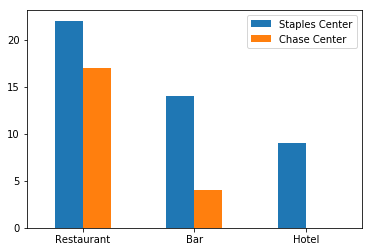

In [62]:
staples = [22, 14, 9]
chase = [17, 4, 0]
index = ['Restaurant', 'Bar', 'Hotel']
df = pd.DataFrame({'Staples Center': staples ,
                    'Chase Center': chase}, index=index)
ax = df.plot.bar(rot=0)

# Both the bar chart and the maps visualize that the Staples Center/Downtown LA neighborhood has more restaurants, bars and hotels than Chase Center/Mission Bay, therefore I would recommend the Staples Center as a host site for the Final Four.